# Physics 77/88 - Fall 2024 - Homework 4 
## Parsing Data and Full Workflow
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 16 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (20P)

The data set *Data.txt* contains a frequency spectrum which has been obtained from a frequency grid search. The first column referes to the frequency $F$ in Hz and the second column contains the corresponding log probabilities $P$ for each frequency interval.<br>
The second data set *ToA.txt* contains the **t**ime **o**f **a**rrival in seconds of the discrete signal.<br>
<br>
Write a function **PlotData.py** using *def*, that<br>
<br>
    1) loads both data sets<br>
    2) finds the peaks in the frequency spectrum. You can use the python library 

from scipy.signal import find_peaks

It makes sense to define a threshold for the height of the peaks, which is usually $s = 3\,\sigma$ above the mean $\mu$, i. e.

'The best frequency is 0.44 Hz'

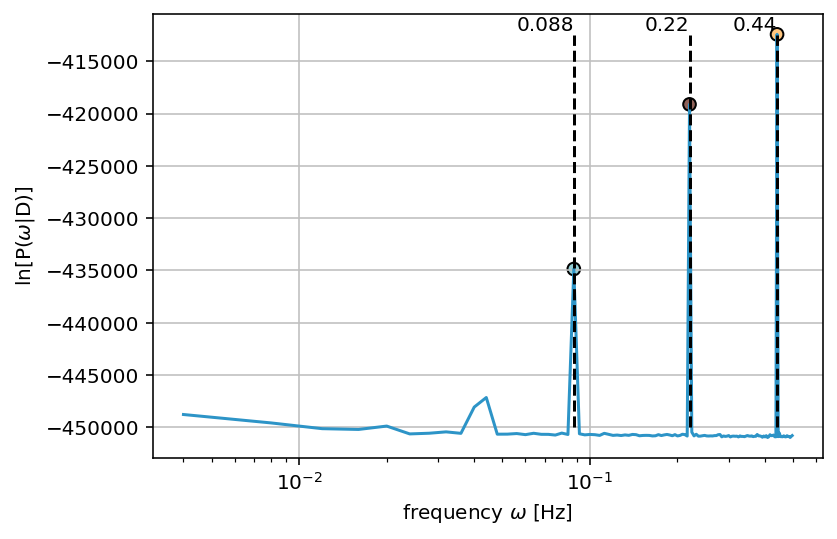

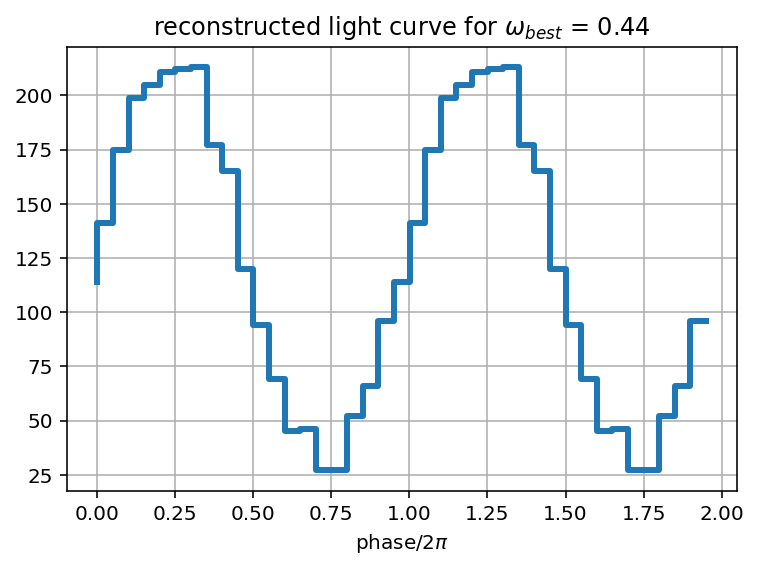

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.colors import LinearSegmentedColormap

def PlotData(data, toa):
    Data = pd.read_csv(data, delimiter=',')
    Toa = pd.read_csv(toa, delimiter = ',')

    data = Data.to_numpy()
    toa = Toa.to_numpy()

    P = data[:,1]
    mu = np.mean(P)
    s = np.std(P)

    p, _ = find_peaks(P, height = mu + 3*s)

    x_vals = data[:,0]
    y_vals = data[:,1]

    xp = x_vals[p]
    yp = y_vals[p]
    
    colors = ["#96CFD5", "#8D3B2D", "#FFC67F"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    
    x = xp.tolist()
    y = yp.tolist()
    labels = [str('{:g}'.format(float('{:.2g}'.format(i)))) for i in x]
    
    plt.grid(color = '0.75')
    plt.scatter(xp, yp, s = 40, c = xp, cmap = cmap, edgecolors = 'black')
    plt.semilogx(x_vals, y_vals, color = '#2D94C7')
    plt.vlines(xp.tolist(), -450000, -412500, colors = 'k', linestyles = 'dashed')
    plt.yticks(np.arange(-450000, -410000, 5000))
    for i in range(len(p)):
        plt.annotate(labels[i], (xp[i], -412500), ha = 'right', va = 'bottom')
    plt.xlabel('frequency $\\omega$ [Hz]')
    plt.ylabel('ln[P($\\omega$|D)]')

    windex = y.index(max(y))
    wbest = labels[windex]
    tphases = np.array((Toa['ToA [s]'] * x[windex]) % (2 * np.pi) / (2 * np.pi))

    fig, ax = plt.subplots()
    hist, bins = np.histogram(tphases, bins = 20)
    bins = np.delete(bins, -1)
    ax.step(np.append(bins,1 + bins), np.append(hist, hist), linewidth = 3)
    ax.set_title('reconstructed light curve for $\\omega_{best}$ = ' + wbest)
    ax.set_xlabel('phase/2$\\pi$')
    ax.grid()

    return 'The best frequency is ' + wbest + ' Hz'

PlotData('Data.txt', 'ToA.txt')

<br>
    3) plots the frequency spectrum and highlights the detected peaks. The figure should look like this:<br>

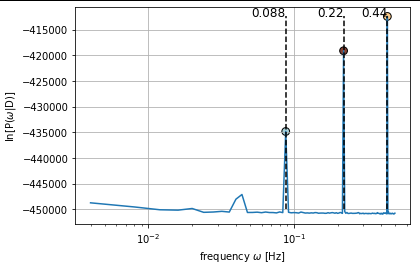

<br>
    4) folds the signal in $ToA.txt$ with the best frequency in order to reconstruct the original signal and plots the signal. The figure should look like this:

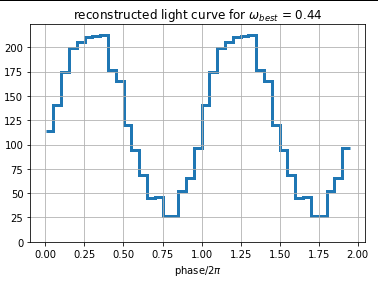

<br>
    5) and finally returns the value for the best frequency.

<br>

## Problem 2 (5P)

Write the Function **PlotLorenz.py** using *def*, that reads the data set *XYZ.csv* using *dask* and generates a 3D plot of the data. The plot should look like this:<br>
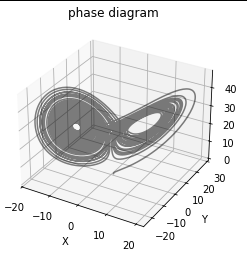

Note that the trajectory is partly transparent!

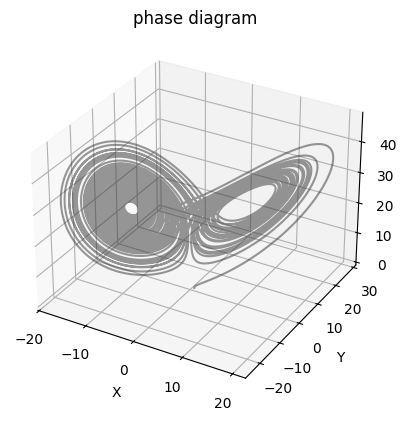

In [2]:
import dask.dataframe as dd
from mpl_toolkits.mplot3d import Axes3D

def PlotLorenz():
    data = dd.read_csv('XYZ.csv')
    data = data.compute()
    X = data['X'].values
    Y = data['Y'].values
    Z = data['Z'].values
    
    
    fig = plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('phase diagram')
    ax.plot(X, Y, Z, c='0.2', alpha = 0.5)
    
PlotLorenz()